<a href="https://colab.research.google.com/github/SujoyDaniel/GoogleCob/blob/GoogleCode/WinePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

Import Dataset 

In [ ]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Plot the data

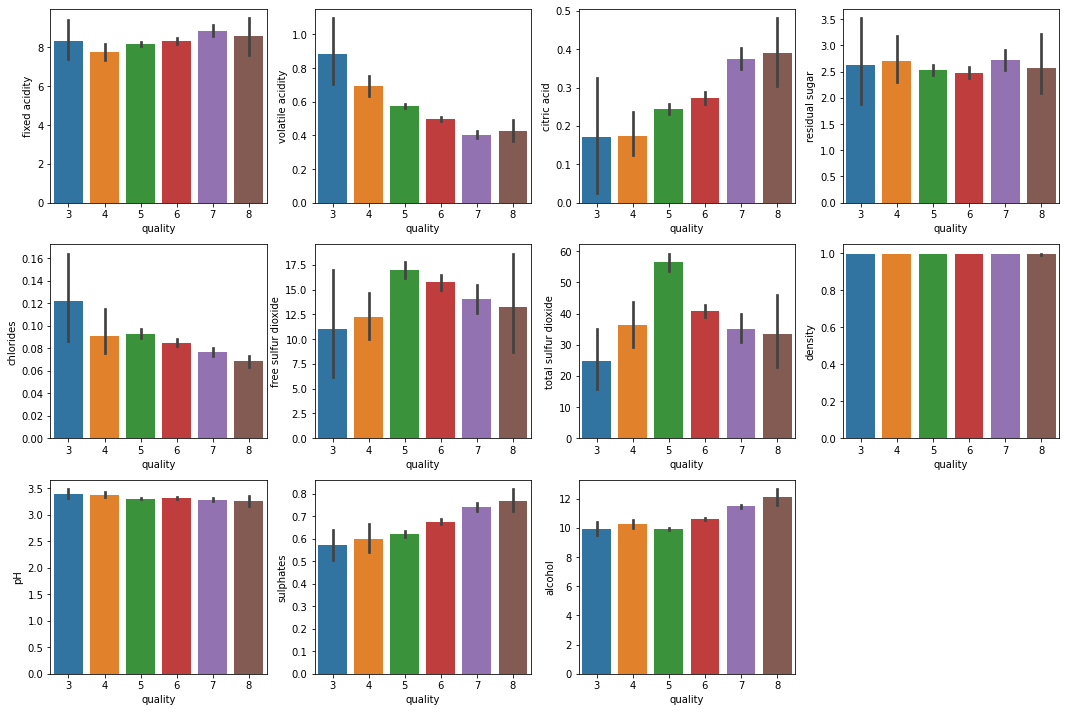

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)
plt.tight_layout()

Make two categories good & bad

In [ ]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

Alloting '0' to bad and '1' to good / Feature Scaling

In [ ]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Check counts if equal

In [ ]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Balancing the two classes

In [ ]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]
new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
286,12.0,0.450,0.55,2.00,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,0
1181,9.8,0.390,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,0
1352,7.6,0.645,0.03,1.90,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,0
342,10.9,0.390,0.47,1.80,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,0
215,7.0,0.490,0.49,5.60,0.060,26.0,121.0,0.99740,3.34,0.76,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,15.0,0.210,0.44,2.20,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1
421,6.6,0.840,0.03,2.30,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,1
1022,7.0,0.510,0.09,2.10,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,0
687,9.1,0.640,0.23,3.10,0.095,13.0,38.0,0.99980,3.28,0.59,9.7,0


Again Check the counts if equal

In [ ]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

Splitting the data into train set and test set

In [ ]:
X = new_df.drop('quality',axis=1) 
y = new_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training the model

In [ ]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
pred = grid_rf.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

{'n_estimators': 300}
[[54 11]
 [10 56]]


              precision    recall  f1-score   support

           0       0.84      0.83      0.84        65
           1       0.84      0.85      0.84        66

    accuracy                           0.84       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.84      0.84      0.84       131



0.8396946564885496
